In [1]:
# Importing all libraries.
from pylab import *
from netCDF4 import Dataset
%matplotlib inline
import os
import cmocean as cm
from trackeddy.tracking import *
from trackeddy.datastruct import *
from trackeddy.geometryfunc import *
from trackeddy.init import *
from trackeddy.physics import *
from trackeddy.plotfunc import *

#import cosima_cookbook as cc

In [2]:
# Output data path
outputpath='/g/data1/v45/pm2987/Spunup/output037/'
# Import SSH values to python environment.
ncfile=Dataset(outputpath+'ocpo.nc')
p=ncfile.variables['p'][0:200,0,:,:]
pmean=np.nanmean(p,axis=0)
# Import geographic coordinates (Lon,Lat)
x=ncfile.variables['xp'][:]
y=ncfile.variables['yp'][:]
p=ncfile.variables['p'][0:2,0,:,:]

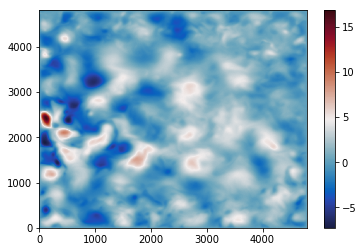

In [3]:
pcolormesh(x,y,p[0,:,:]-pmean,cmap=cm.cm.balance)
colorbar()

In [4]:
eddytd=analyseddyzt(p,x,y,0,1,1,15,0.1,0.1,data_meant=pmean,areamap='',mask=''\
                     ,destdir='',physics='',checkarea=False,diagnostics=False,pprint=False)
eddytdn=analyseddyzt(p,x,y,0,1,1,-15,-0.1,-0.1,data_meant=pmean,areamap='',mask=''\
                     ,destdir='',physics='',checkarea=False,diagnostics=False,pprint=False)

 0% [>]100% Time Elapsed: 86 s  Number of contours analysed: 4 
 0% [>]100% Time Elapsed: 76 s  Number of contours analysed: 47 


In [5]:
#for key,items in eddytdn.items():
    #print(items['2dgaussianfit'][0],items['level'][0])

#twoD_Gaussian(eddytdn['eddyn_15']['position_maxvalue'][0:2], *eddytdn['eddyn_15']['2dgaussianfit'])
#


In [6]:
eddytdn['eddyn_0']

{'2dgaussianfit': array([[1., 1., 0., 0., 0., 0.]]),
 'angle': array([-0.27074385]),
 'area': array([2.25096802e+14]),
 'contour': [[array([110.        , 115.        , 120.        , 125.        ,
          130.        , 135.        , 140.        , 145.        ,
          150.        , 155.        , 158.60655398, 160.        ,
          165.        , 170.        , 170.65040749, 175.        ,
          177.44239934, 180.        , 181.59928617, 184.18440821,
          185.        , 185.75476159, 186.59628932, 186.88647911,
          186.71007352, 186.13942494, 185.23279351, 185.        ,
          183.89485937, 182.21887627, 180.31930943, 180.        ,
          178.02343932, 175.63179706, 175.        , 173.01121621,
          170.42594932, 170.        , 167.68883489, 165.12106871,
          165.        , 162.4044063 , 160.        , 159.93220187,
          157.31750016, 155.        , 154.98706252, 152.54369819,
          150.39296455, 150.        , 148.25728775, 146.34207178,
          14

In [7]:
sfield=reconstruct_syntetic(shape(p),x,y,eddytd,diagnostics=False)+reconstruct_syntetic(shape(p),x,y,eddytdn,diagnostics=False)

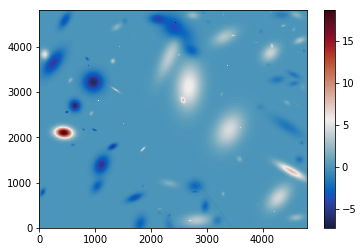

In [8]:
pcolormesh(x,y,sfield[0,:,:],cmap=cm.cm.balance)
colorbar()

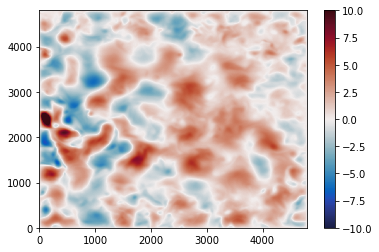

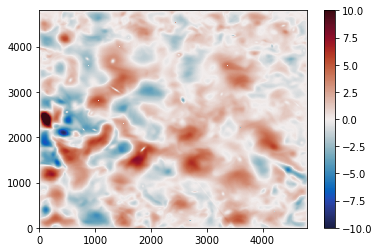

In [9]:
pcolormesh(x,y,p[0,:,:]-pmean,vmin=-10,vmax=10,cmap=cm.cm.balance)
colorbar()
show()
pcolormesh(x,y,p[0,:,:]-pmean-sfield[0,:,:],vmin=-10,vmax=10,cmap=cm.cm.balance)
colorbar()
show()